# Flute

## Objectif de ce fichier

pipopipopipo

## Code

On importe le son de la flûte.

On affiche et on joue le son pour s'assurer qu'il est bien **Ne fonctionne pas ?**

In [61]:
using WAV
using Plots
using WORLD
using ImageView
using LinearAlgebra
using DSP

In [78]:
y_flute, fs_flute = wavread("fluteircam.wav");
y_flute = vec(y_flute);
fs_flute = floor(Int, fs_flute);
t_flute = (0 : 1 : size(y_flute)[1]-1)/fs_flute;

In [77]:
#wavplay(y_flute, fs_flute);
plot(t_flute, y_flute, title="Flute",label=["Signal brut"])

In [80]:
opt = HarvestOption(300.0, 800.0, 0.2)#floor and ceil freq, period
f0, timeaxis = harvest(y_flute, fs_flute, opt);

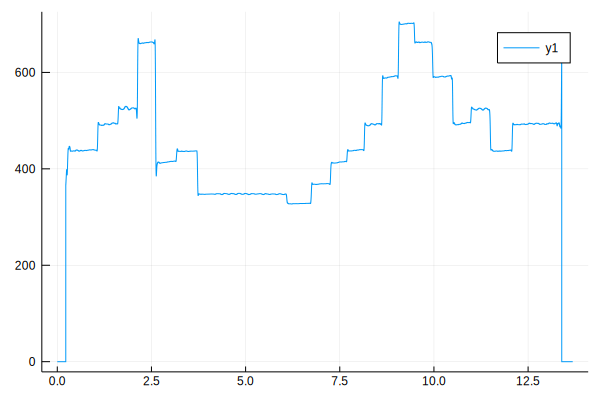

In [81]:
plot(timeaxis, f0)

In [66]:
opt = DioOption(f0floor=300.0, f0ceil=800.0, channels_in_octave=2.0,
        period=0.2, speed=1)
f0, timeaxis = dio(y_flute, fs_flute, opt);

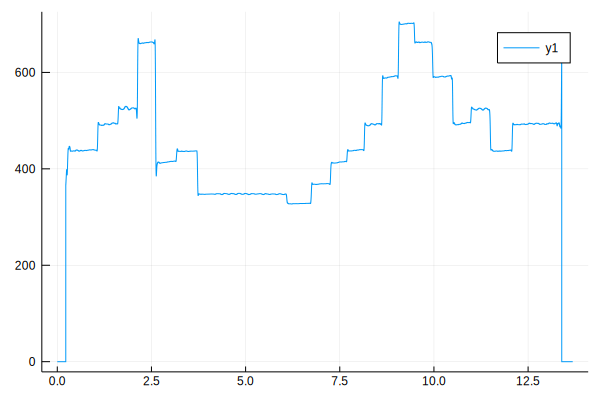

In [82]:
plot(timeaxis, f0)

In [68]:
spectrogram = cheaptrick(y_flute, fs_flute, timeaxis, f0);

In [69]:
 #normalize(spectrogram, 2)

In [70]:
println(size(spectrogram))

(1025, 68426)


In [75]:
#imshow(spectrogram)

In [76]:
s = y_flute
fs = fs_flute
S = spectrogram(s[:,1], convert(Int, 25e-3*fs), convert(Int, 10e-3*fs); window=hanning)
t = time(S)
f = freq(S)
imshow(flipud(log10(power(S))), extent=[first(t), last(t), fs*first(f), fs*last(f)], aspect="auto")

ErrorException: function Array does not accept keyword arguments